In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sps
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
def f1(x, L=100, mu=0.1):
    '''
    FUNCTION TO BE OPTIMISED
    '''

    return (L-mu)/8.0 * (x[0]**2 + np.sum((x[2:] - x[1:-1])**2) - 2*x[0])
    + mu/2*np.linalg.norm(x)**2

def f2(x, y, L, W, c, alpha=100):
    def summed(x, y, c, alpha):
        s = 0.0
        n = len(x)
        for i in range(n):
            for j in range(n):
                sum += x[i] + y[j] - alpha * c[i][j]
        return s
    return -np.dot(L, x) - np.dot(W, y) + np.log(summed(x, y, c, alpha))

def f3(x, alpha=10):
    return (x[0] - 1)**2 + alpha * np.sum((x[1:] - x[:-1]**2)**2)

In [3]:
def grad(f,x): 
    '''
    CENTRAL FINITE DIFFERENCE CALCULATION
    '''
    h = np.cbrt(np.finfo(float).eps)
    d = len(x)
    nabla = np.zeros(d)
    for i in range(d): 
        x_for = np.copy(x) 
        x_back = np.copy(x)
        x_for[i] += h 
        x_back[i] -= h 
        nabla[i] = (f(x_for) - f(x_back))/(2*h) 
    return nabla 

In [29]:
def line_search(f,x,p,nabla, lintol):
    '''
    BACKTRACK LINE SEARCH WITH WOLFE CONDITIONS
    '''
    a = 1
    c1 = 1e-4 
    c2 = 0.9 
    fx = f(x)
    x_new = x + a * p 
    nabla_new = grad(f,x_new)
    while f(x_new) >= fx + (c1*a*nabla.T@p) or nabla_new.T@p <= c2*nabla.T@p or np.linalg.norm(x_new - x) > lintol: 
        a *= 0.5
        x_new = x + a * p 
        nabla_new = grad(f,x_new)
    return a

In [51]:
def BFGS( f, x0, max_it, tol, lin_tol):
    '''
    DESCRIPTION
    BFGS Quasi-Newton Method, implemented as described in Nocedal:
    Numerical Optimisation.
    INPUTS:
    f:      function to be optimised 
    x0:     intial guess
    max_it: maximum iterations 
    plot:   if the problem is 2 dimensional, returns 
            a trajectory plot of the optimisation scheme.
    OUTPUTS: 
    x:      the optimal solution of the function f 
    '''
    d = len(x0) # dimension of problem 
    nabla = grad(f,x0) # initial gradient 
    H = np.eye(d) # initial hessian
    x = x0[:]
    it = 2
    while np.linalg.norm(nabla) > tol: # while gradient is positive
        if it > max_it: 
            print('Maximum iterations reached!')
            break
        it += 1
        p = -H@nabla # search direction (Newton Method)
        a = line_search(f,x,p,nabla, lin_tol) # line search 
        s = a * p 
        x_new = x + a * p 
        nabla_new = grad(f,x_new)
        
        y = nabla_new - nabla 
        y = np.array([y])
        
        s = np.array([s])
        y = np.reshape(y,(d,1))
        s = np.reshape(s,(d,1))
        
        r = 1/(y.T@s)
        li = (np.eye(d)-(r*((s@(y.T)))))
        ri = (np.eye(d)-(r*((y@(s.T)))))
        hess_inter = li@H@ri
        H = hess_inter + (r*((s@(s.T)))) # BFGS Update
        nabla = nabla_new[:] 
        x = x_new[:]
    return {'x' : x, 'tolerance' : tol, 'lintol' : lin_tol, 'nit' : it}

## График зависимости времени решения от размерности задачи.

In [61]:
func_names = ['f1', 'f2', 'f3']

In [62]:
import time

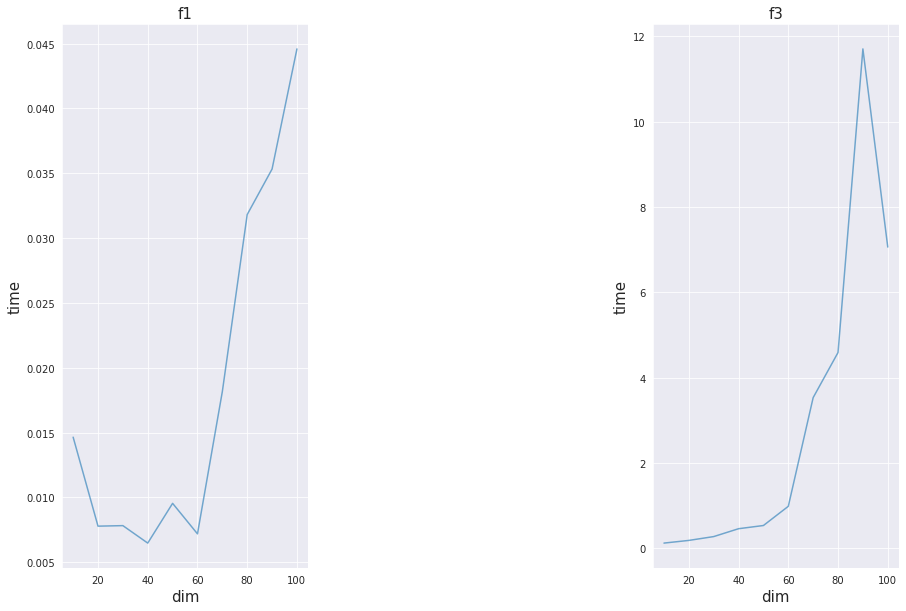

In [88]:
times=[]
sns.set_style('darkgrid')
dim_grid = [10, 20, 30, 40, 50, 60, 70,
            80, 90, 100]

plt.figure(figsize = (15, 10))
tol = 1e-5
lin_tol=1e-7
finds = [0, 2]

for f_ind in finds:   
    for dim in dim_grid:
        start = time.time()

        x_0 = np.full(shape=dim, fill_value=100, dtype=np.int)
        res = BFGS(funcs[f_ind], x_0, np.inf, tol, lin_tol)
        point = res['x']

        end = time.time()
        times.append(end - start)
        
    ax = plt.subplot(1, 3, f_ind+1)
    plt.plot(dim_grid, times, alpha = 0.6)
    plt.title(func_names[f_ind], fontsize=15)
    plt.xlabel('dim', fontsize=15)
    plt.ylabel('time', fontsize=15)

    times = []

## График зависимости времени от точности

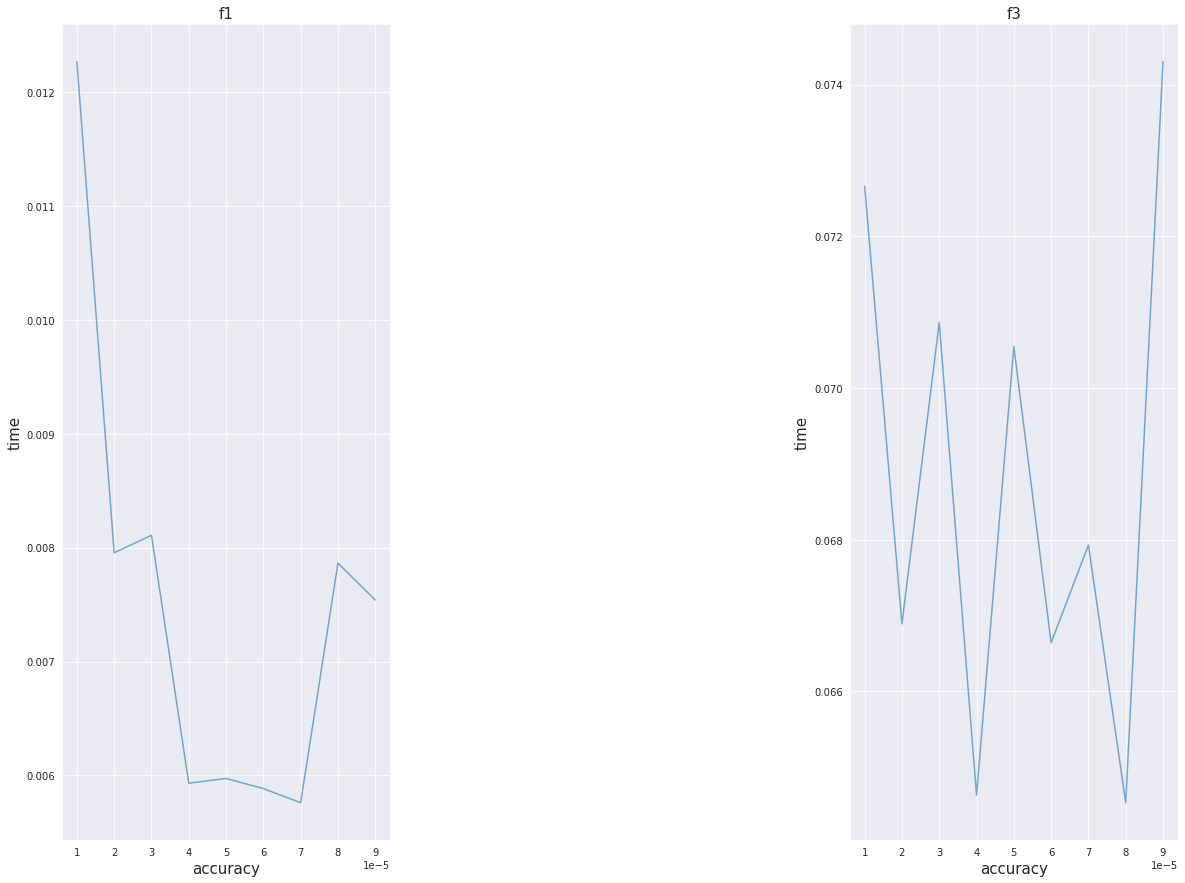

In [85]:
times=[]
sns.set_style('darkgrid')
tol_grid = np.arange(1e-5, 1e-4, 1e-5)

plt.figure(figsize = (20, 15))
x_0 = np.full(shape=10, fill_value=100, dtype=np.int)
lin_tol=1e-7
finds = [0, 2]

for f_ind in finds:   
    for tol in tol_grid:
        start = time.time()

        res = BFGS(funcs[f_ind], x_0, np.inf, tol, lin_tol)
        point = res['x']

        end = time.time()
        times.append(end - start)
        
    ax = plt.subplot(1, 3, f_ind+1)
    plt.plot(tol_grid, times, alpha = 0.6)
    plt.title(func_names[f_ind], fontsize=15)
    plt.xlabel('accuracy', fontsize=15)
    plt.ylabel('time', fontsize=15)

    times = []

## График времени от линейной точности

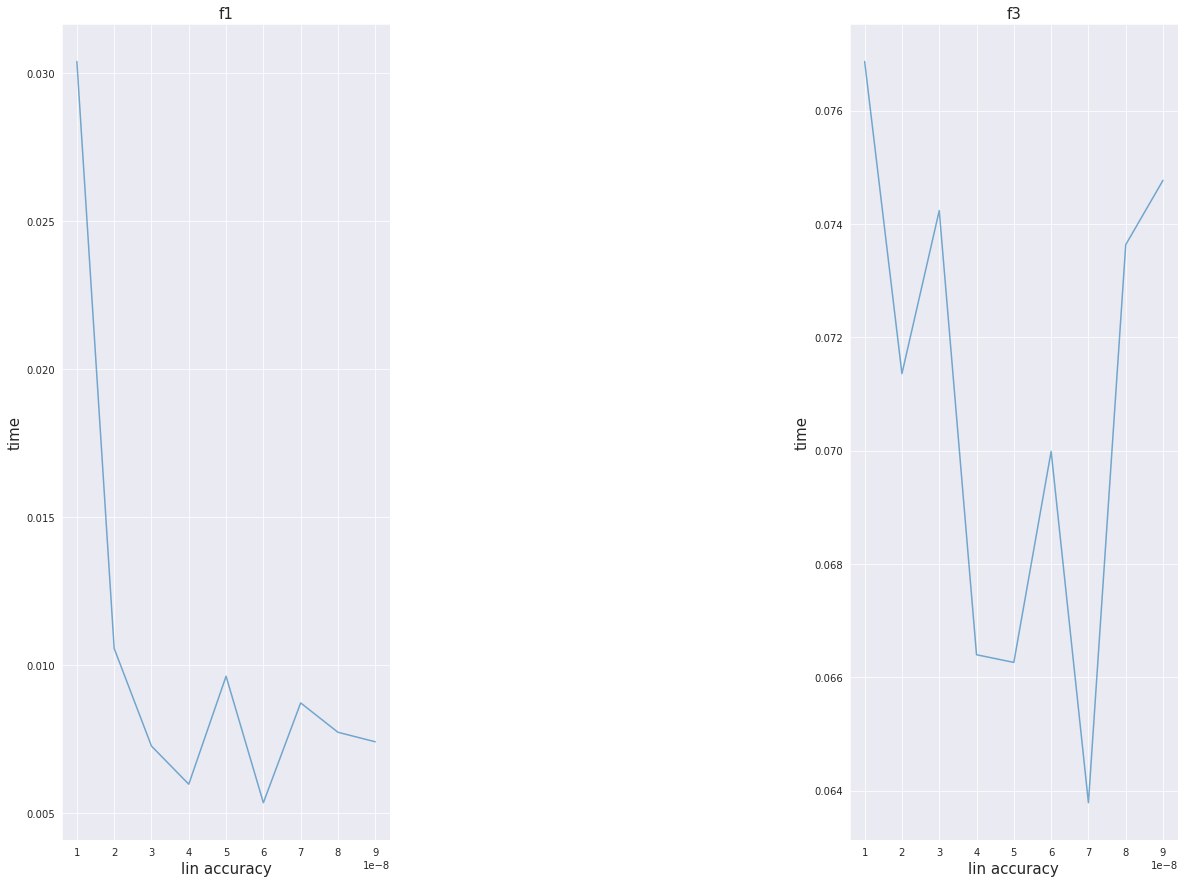

In [99]:
times=[]
sns.set_style('darkgrid')
lintol_grid = np.arange(1e-8, 1e-7, 1e-8)

plt.figure(figsize = (20, 15))
tol = 1e-5
finds = [0, 2]

for f_ind in finds:   
    for lin_tol in lintol_grid:
        start = time.time()

        res = BFGS(funcs[f_ind], x_0, np.inf, tol, lin_tol)
        point = res['x']

        end = time.time()
        times.append(end - start)
        
    ax = plt.subplot(1, 3, f_ind+1)
    plt.plot(lintol_grid, times, alpha = 0.6)
    plt.title(func_names[f_ind], fontsize=15)
    plt.xlabel('lin accuracy', fontsize=15)
    plt.ylabel('time', fontsize=15)

    times = []

## График времени от расстояния между начальной точкой и точкой минимума

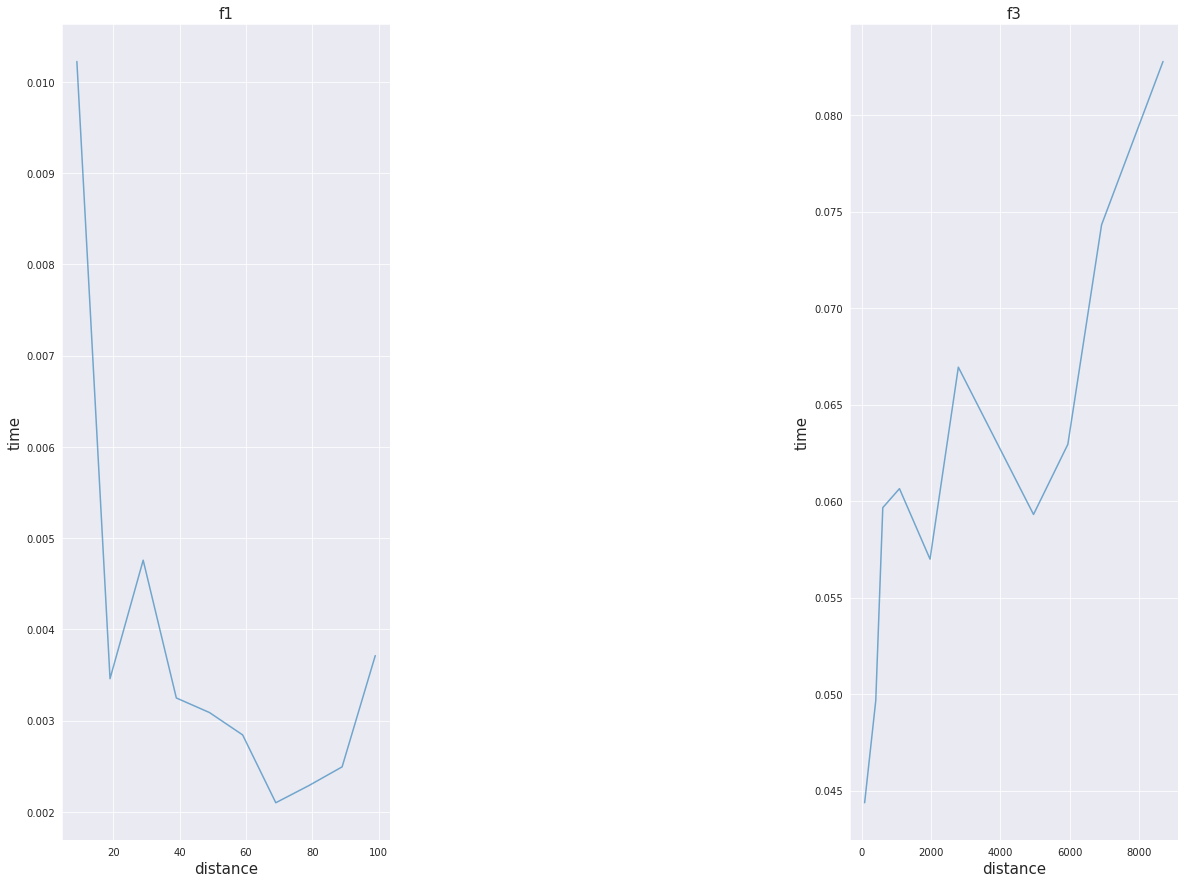

In [97]:
times=[]
norm=[]
sns.set_style('darkgrid')
val_grid = np.linspace(10, 100, 10)

plt.figure(figsize = (20, 15))
tol = 1e-5
finds = [0, 2]

for f_ind in finds:   
    for val in val_grid:
        start = time.time()

        x_0 = np.full(shape=10, fill_value=val, dtype=np.int)
        res = BFGS(funcs[f_ind], x_0, np.inf, tol, lin_tol)
        point = res['x']

        end = time.time()
        norm.append(np.linalg.norm(x_0 - point))
        times.append(end - start)
            
    ax = plt.subplot(1, 3, f_ind+1)
    plt.plot(norm, times, alpha = 0.6)
    plt.title(func_names[f_ind], fontsize=15)
    plt.xlabel('distance', fontsize=15)
    plt.ylabel('time', fontsize=15)

    times = []
    norm =[]